In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eUF7Yi_sNCXK_DqT9SVffQWmstw__Z7B3SYHhdCwZmBo',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'b7windpower-donotdelete-pr-c6dgxiz3ahhiqh'
object_key = 'Wind_Dataset.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os

In [7]:
data.shape

(50530, 5)

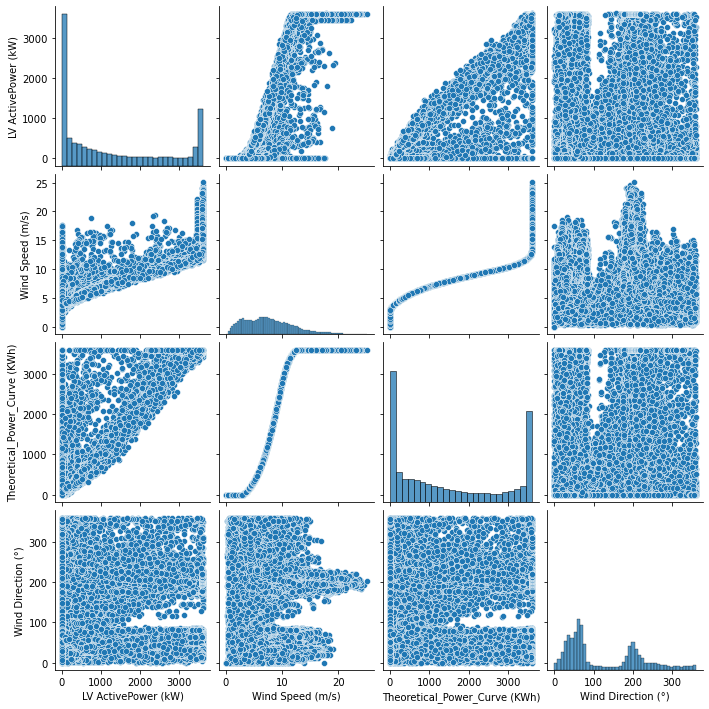

In [8]:
from matplotlib import rcParams
sns.pairplot(data)

<AxesSubplot:>

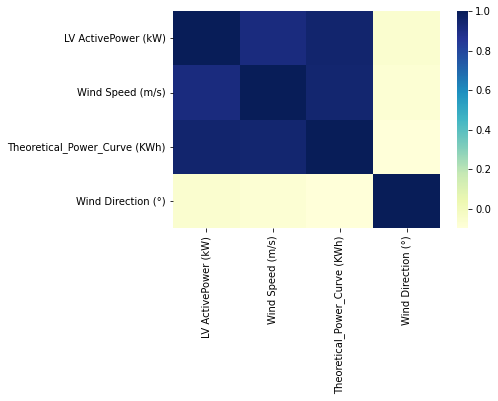

In [9]:
data.corr()
sns.heatmap(data.corr(),cmap = 'YlGnBu')

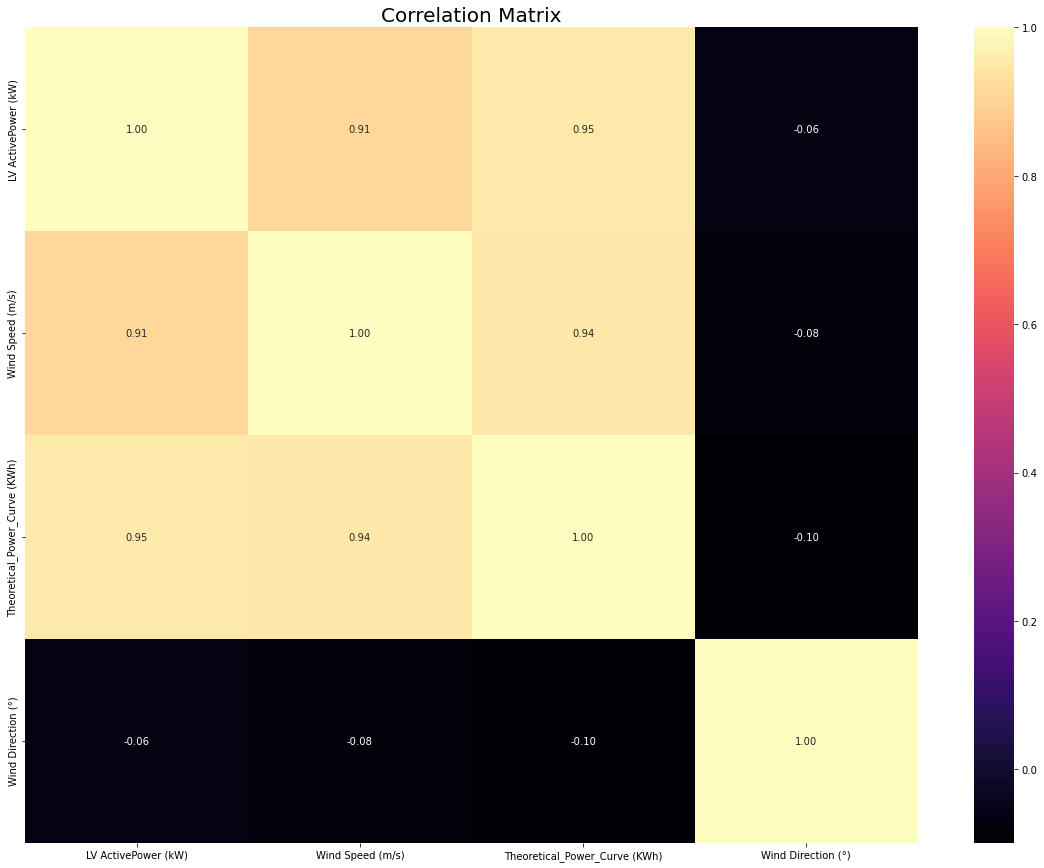

In [10]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [12]:
data.describe

<bound method NDFrame.describe of               Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0      01 01 2018 00:00           380.047791          5.311336   
1      01 01 2018 00:10           453.769196          5.672167   
2      01 01 2018 00:20           306.376587          5.216037   
3      01 01 2018 00:30           419.645905          5.659674   
4      01 01 2018 00:40           380.650696          5.577941   
...                 ...                  ...               ...   
50525  31 12 2018 23:10          2963.980957         11.404030   
50526  31 12 2018 23:20          1684.353027          7.332648   
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.917511          268.64111

In [13]:
data.isnull().any()

Date/Time                        False
LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
dtype: bool

In [14]:
data.rename(columns = {'LV ActivePower (kW)':'ActivePower(kW)',
                       "Wind Speed (m/s)":"WindSpeed(m/s)",
                       "Wind Direction (°)":"WindDirection","Theoretical_Power_Curve (KWh)":"TheoreticalPowerCurve(KWh)"},
            inplace = True)
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [15]:

data['Date/Time'] = pd.to_datetime(data['Date/Time'],format='%d %m %Y %H:%M')
data['year'] = data['Date/Time'].dt.year 
data['month'] = data['Date/Time'].dt.month 
data['day'] = data['Date/Time'].dt.day

In [16]:
data['Hour'] = data['Date/Time'].dt.hour 
data['minute'] = data['Date/Time'].dt.minute 
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40


In [17]:

def mean_speed(x):
    x = round(x,2)
    a = x//1
    a,b = a+0.25,a+0.75
    if x < a:
        x = a - 0.25
    else:
        x = b -0.25
    return x

In [18]:

data['meanSpeed'] = data['WindSpeed(m/s)'].apply(mean_speed)
data.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5
...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5


In [19]:
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [20]:
data["meanDirection"]=data["WindDirection"].apply(mean_direction)
data.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5,240
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5,210
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5,240
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5,240


In [21]:

directiondict = {0:"N", 30:"NNE", 60:"NEE", 90:"E", 120:"SEE", 150:"SSE", 180:"S", 210:"SSW", 240:"SWW", 270:"W", 300:"NWW", 330:"NNW"}

def wind_direction(x):
  for x in directiondict:
    return directiondict[x]

In [22]:
data['windCDirection'] = data['meanDirection'].apply(wind_direction)


In [23]:
data.head(10)


,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection,windCDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270,N
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270,N
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270,N
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270,N
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270,N
5,2018-01-01 00:50:00,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50,5.5,270,N
6,2018-01-01 01:00:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0,5.5,270,N
7,2018-01-01 01:10:00,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10,5.5,270,N
8,2018-01-01 01:20:00,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20,5.5,240,N
9,2018-01-01 01:30:00,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30,5.5,270,N


<AxesSubplot:xlabel='meanDirection', ylabel='Count'>

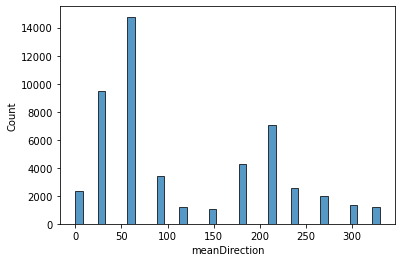

In [24]:
sns.histplot(x=data.meanDirection)

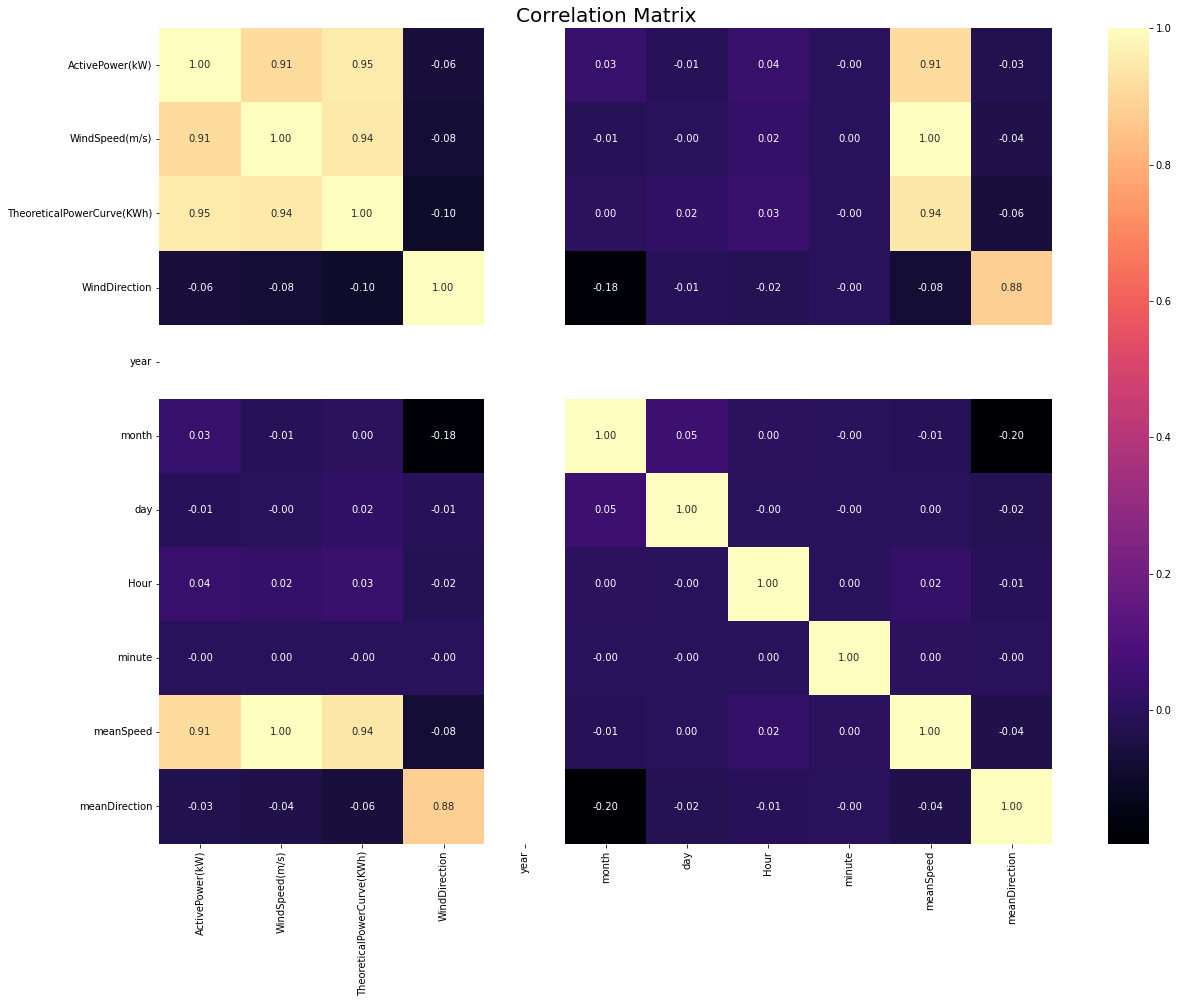

In [25]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date/Time                   50530 non-null  datetime64[ns]
 1   ActivePower(kW)             50530 non-null  float64       
 2   WindSpeed(m/s)              50530 non-null  float64       
 3   TheoreticalPowerCurve(KWh)  50530 non-null  float64       
 4   WindDirection               50530 non-null  float64       
 5   year                        50530 non-null  int64         
 6   month                       50530 non-null  int64         
 7   day                         50530 non-null  int64         
 8   Hour                        50530 non-null  int64         
 9   minute                      50530 non-null  int64         
 10  meanSpeed                   50530 non-null  float64       
 11  meanDirection               50530 non-null  int64     

In [27]:
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

for i in range(0,12):
    data1T_A=data[data["windCDirection"] == list_yon[i]]
    
    DepGroup_A = data1T_A.groupby("meanSpeed")
    data_T_A = DepGroup_A.mean()
    
    data_T_A.drop(columns = {"WindSpeed(m/s)",
                             "WindDirection",
                             "meanDirection"},
                  inplace = True)
    
    listTA_WS = data_T_A.index.copy()
    data_T_A["WindSpeed(m/s)"] = listTA_WS
    
    data_T_A = data_T_A[["WindSpeed(m/s)",
                         "ActivePower(kW)",
                         "TheoreticalPowerCurve(KWh)"]]
    
    data_T_A["Index"] = list(range(1,len(data_T_A.index)+1))

    data_T_A.set_index("Index", inplace = True)
    
    data_T_A = data_T_A.round({'ActivePower(kW)': 2,
                             'TheoreticalPowerCurve(KWh)': 2})
    
    data_T_A["count"] = [len(data1T_A["meanSpeed"][data1T_A["meanSpeed"] == x]) for x in data_T_A["WindSpeed(m/s)"]]
    list_data.append(data_T_A)


In [28]:
data_T_N = list_data[0]
data_T_NNE = list_data[1]
data_T_NEE = list_data[2]
data_T_E = list_data[3]
data_T_SEE = list_data[4]
data_T_SSE = list_data[5]
data_T_S = list_data[6]
data_T_SSW = list_data[7]
data_T_SWW = list_data[8]
data_T_W = list_data[9]
data_T_NWW = list_data[10]
data_T_NNW = list_data[11]

list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

In [29]:
def graph_T(i):
    fig = plt.figure(figsize=(20,10))  
    plt.plot(list_table[i]["WindSpeed(m/s)"],
             list_table[i]["TheoreticalPowerCurve(KWh)"],
             label = "Theoretical Power Curve",
             marker = "o", markersize = 10, linewidth = 5)
    
    plt.plot(list_table[i]["WindSpeed(m/s)"],
             list_table[i]["ActivePower(kW)"],
             label = "Actual Power Curve",
             marker = "o", markersize = 10, linewidth = 5)
    
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Direction towards {}".format(list_tableName[i]))
    plt.legend()
    plt.show()
    fig.savefig("{}_Powercurve.jpeg".format(list_tableName[i]))
    plt.close(fig)

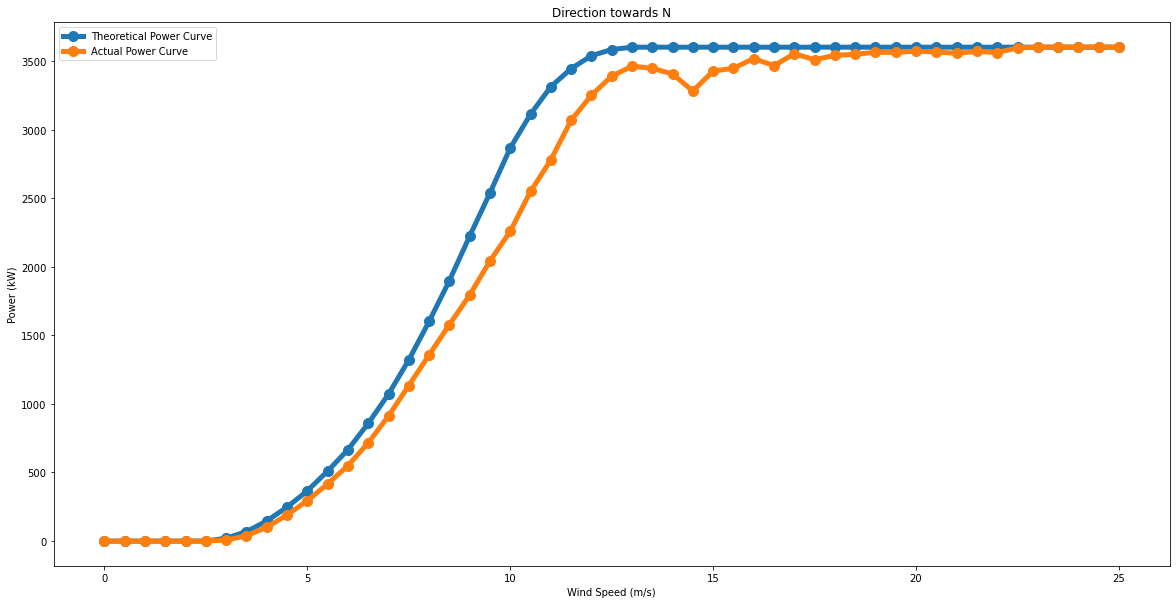

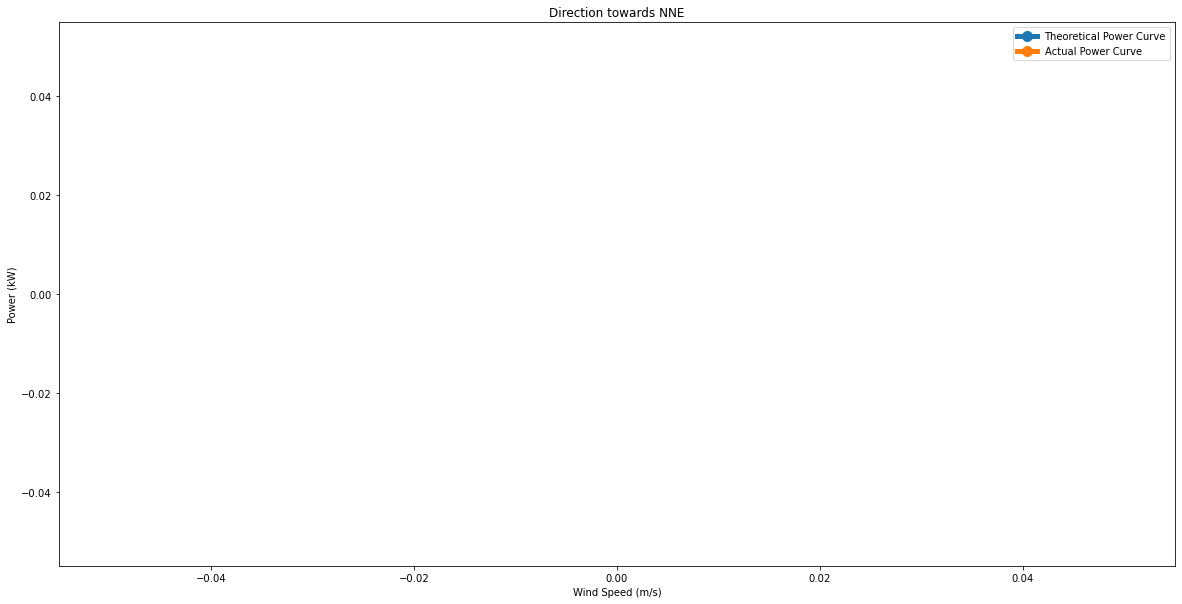

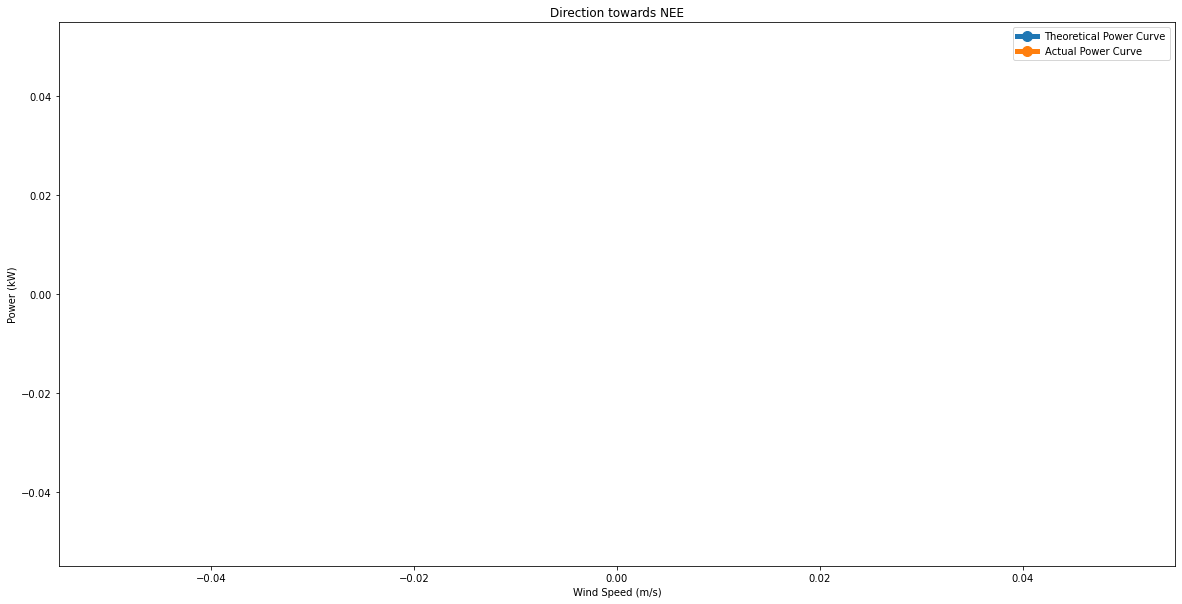

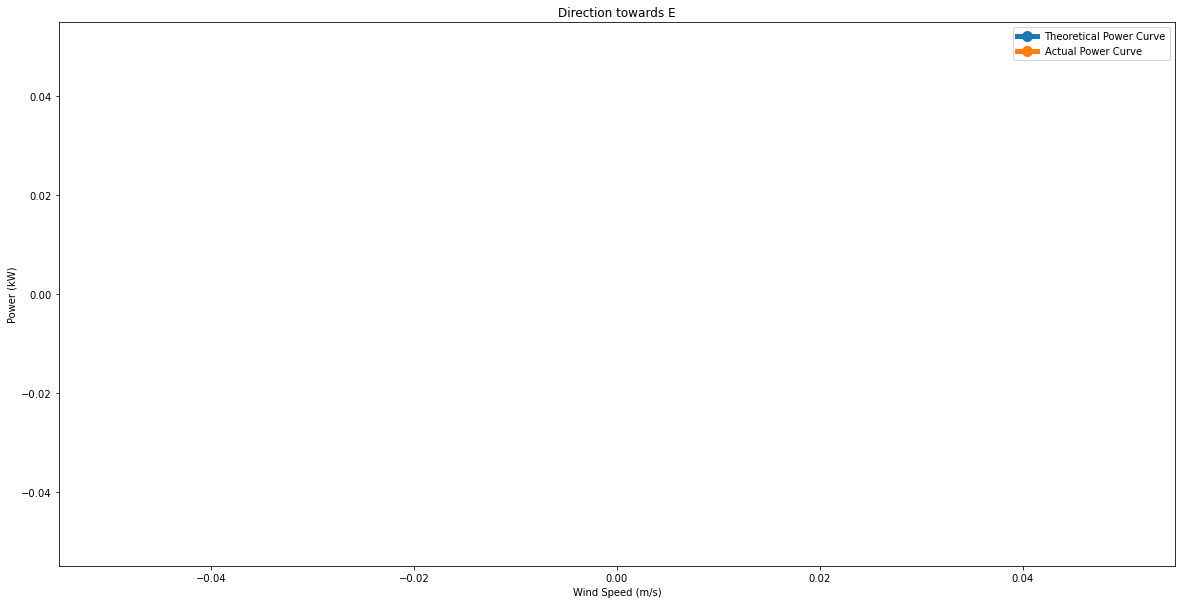

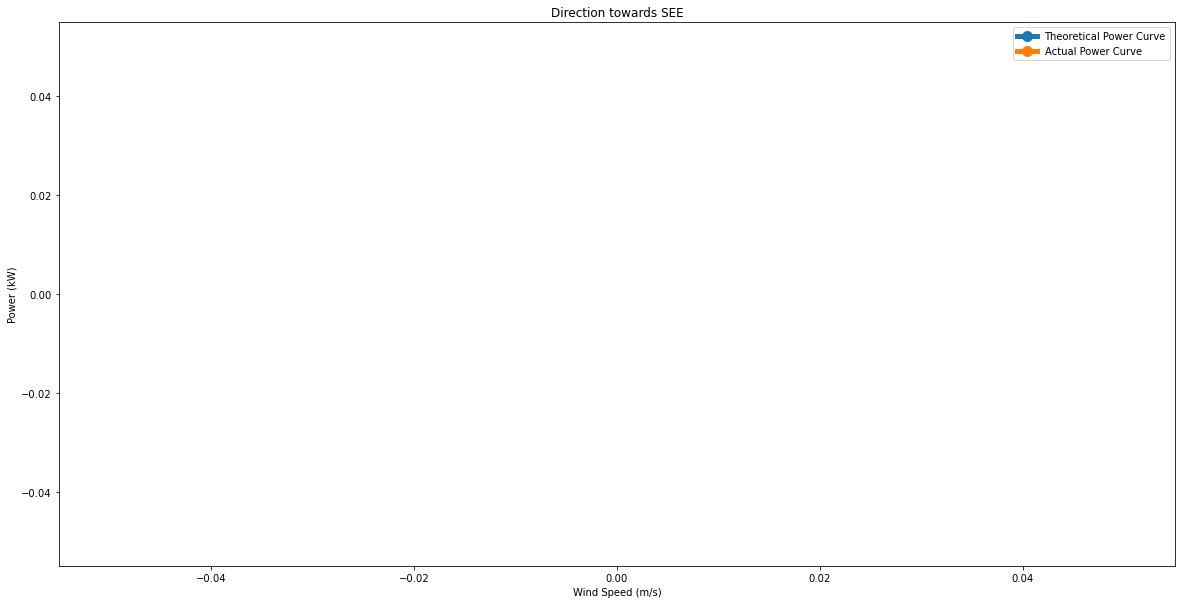

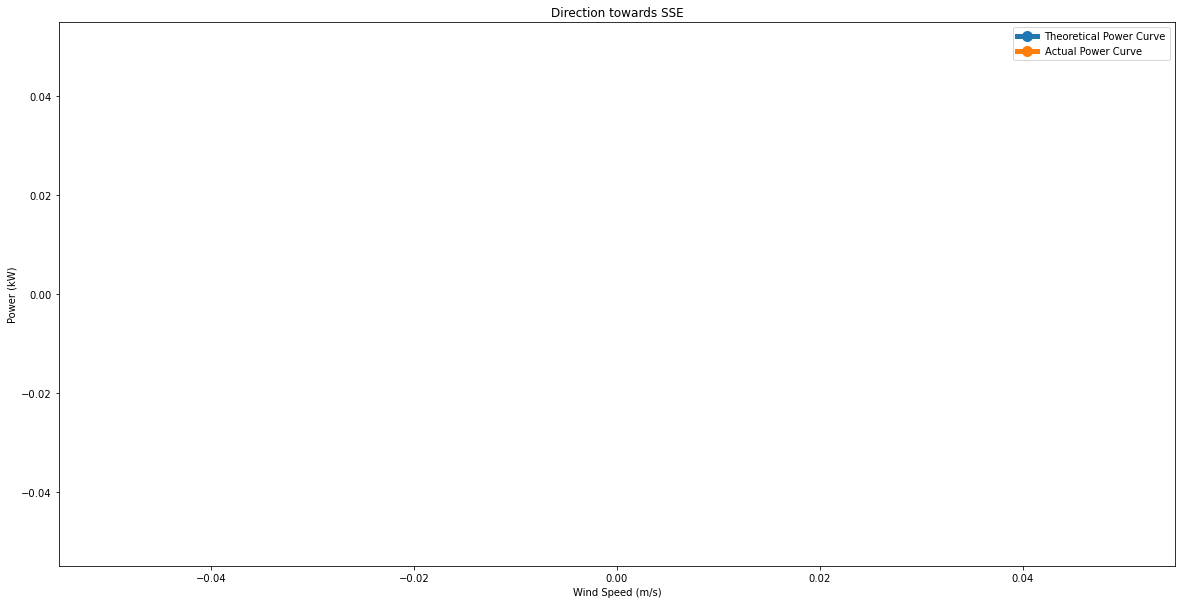

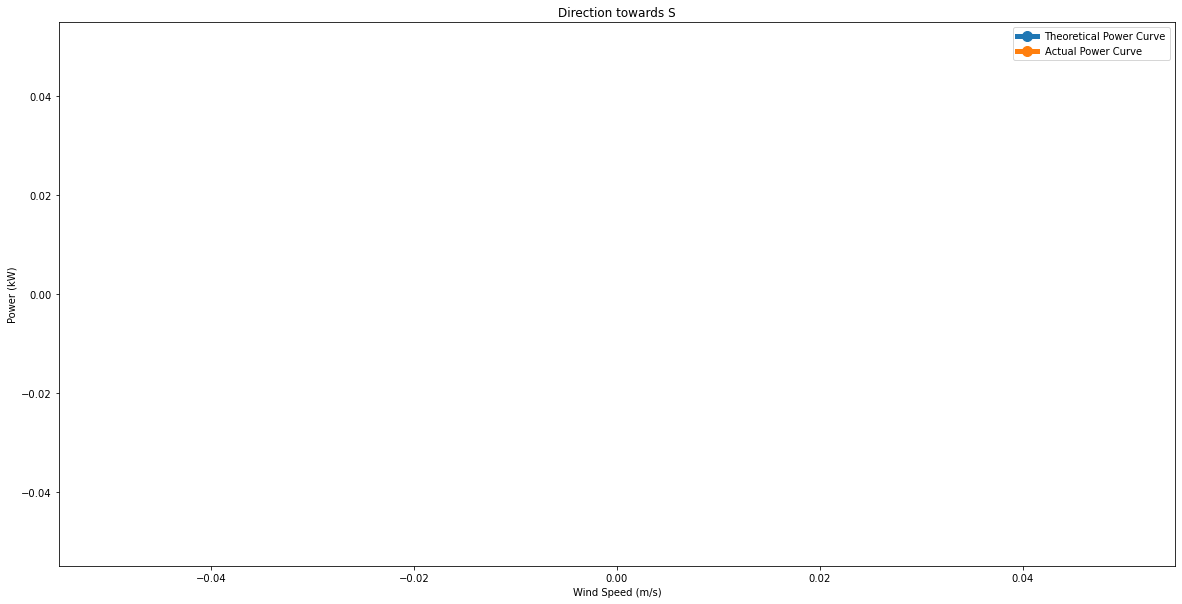

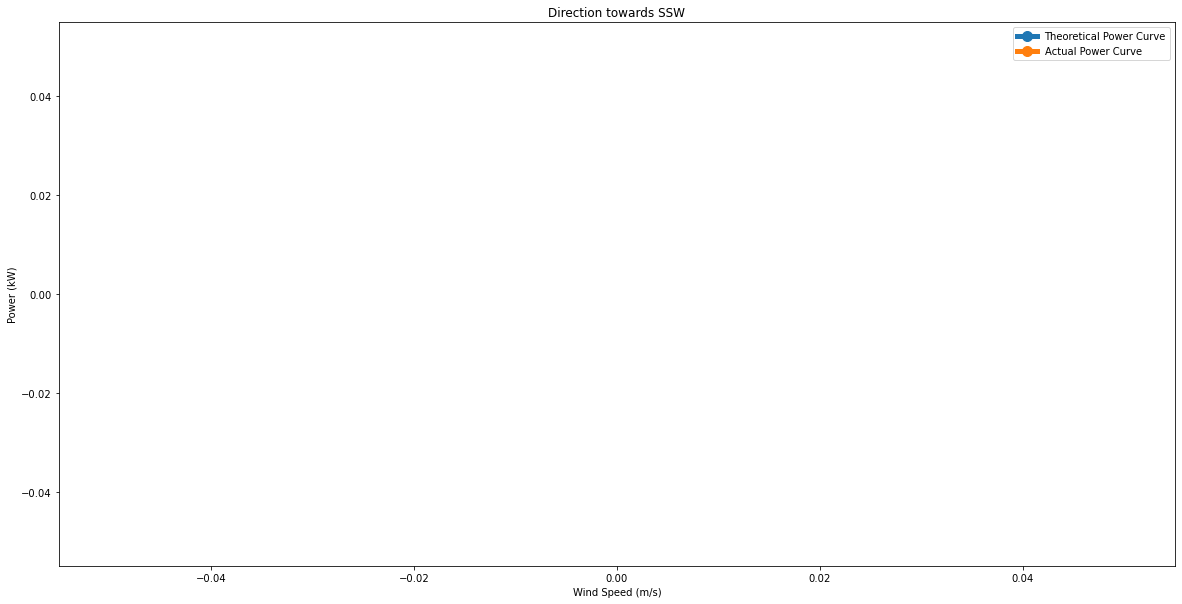

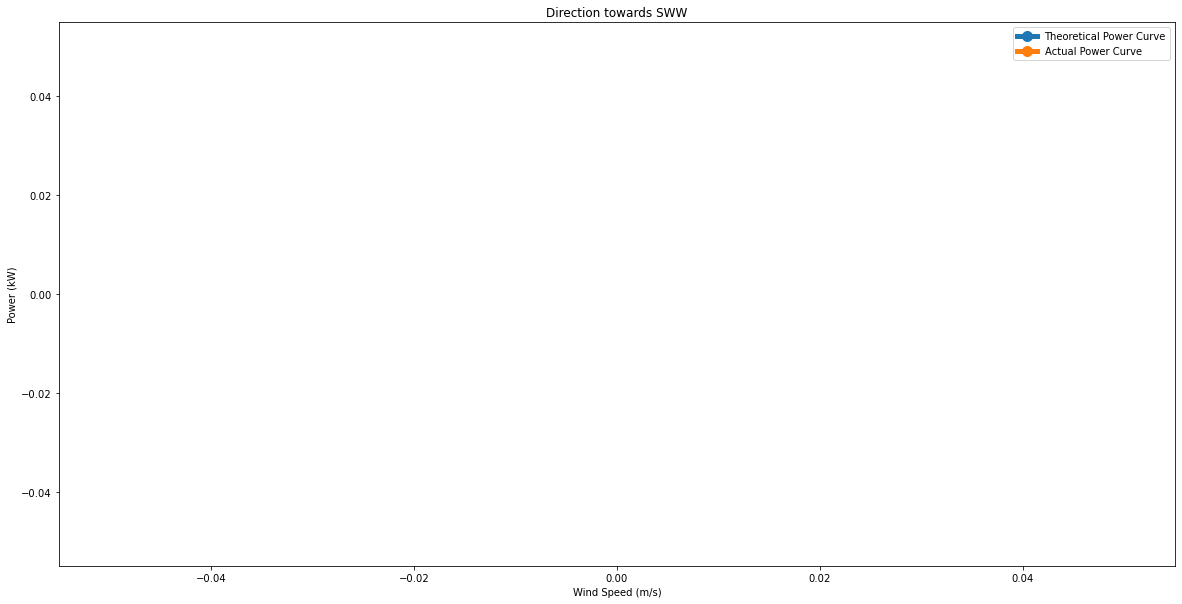

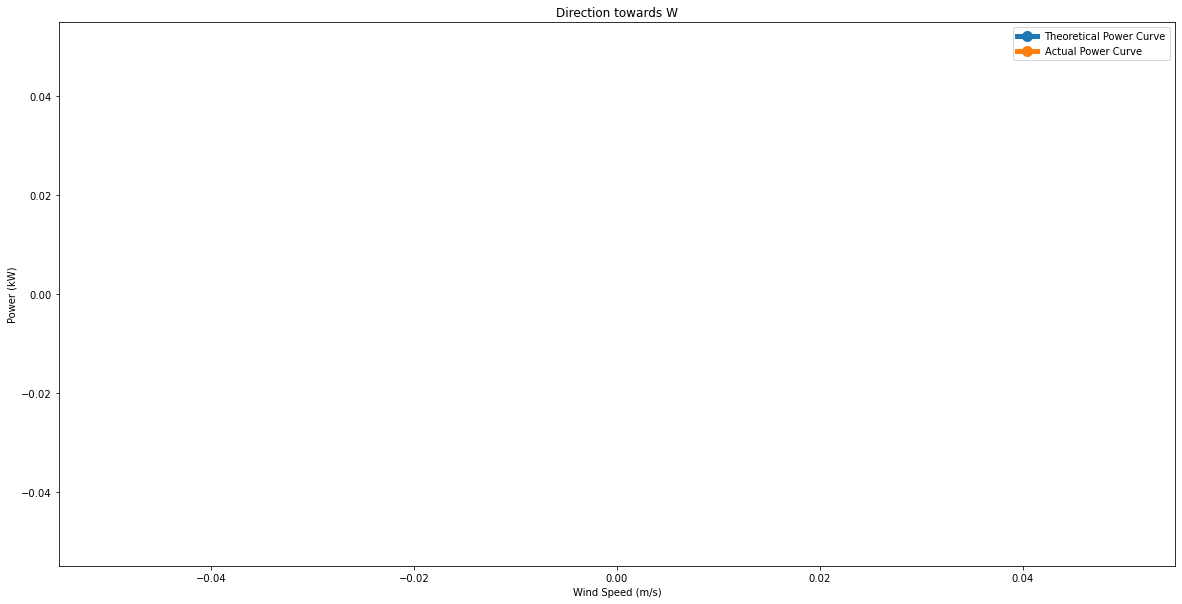

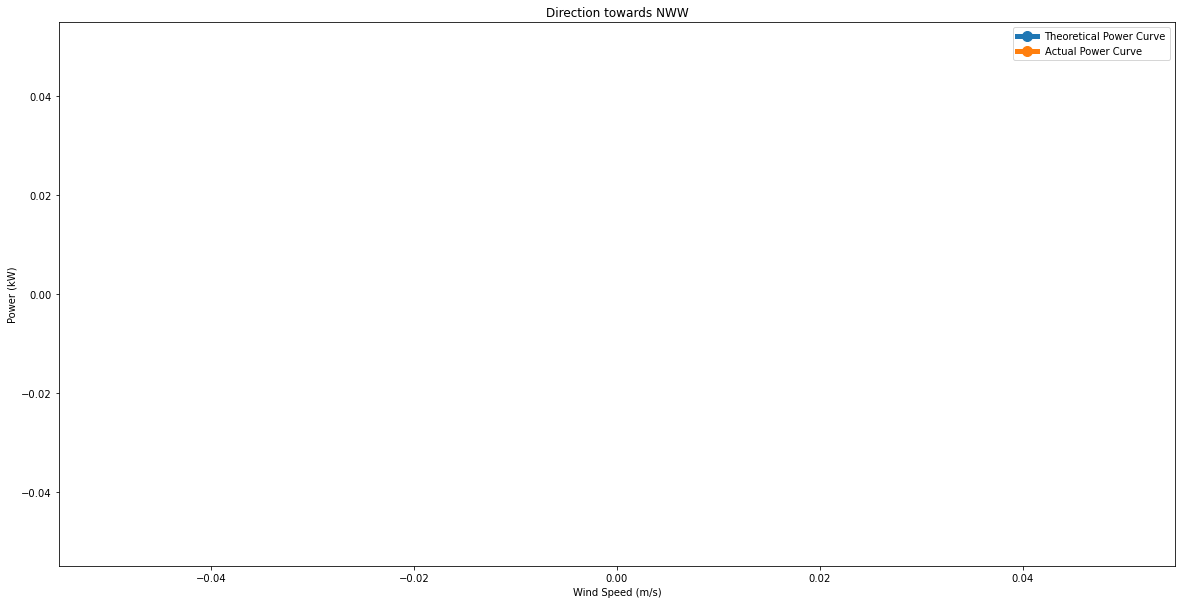

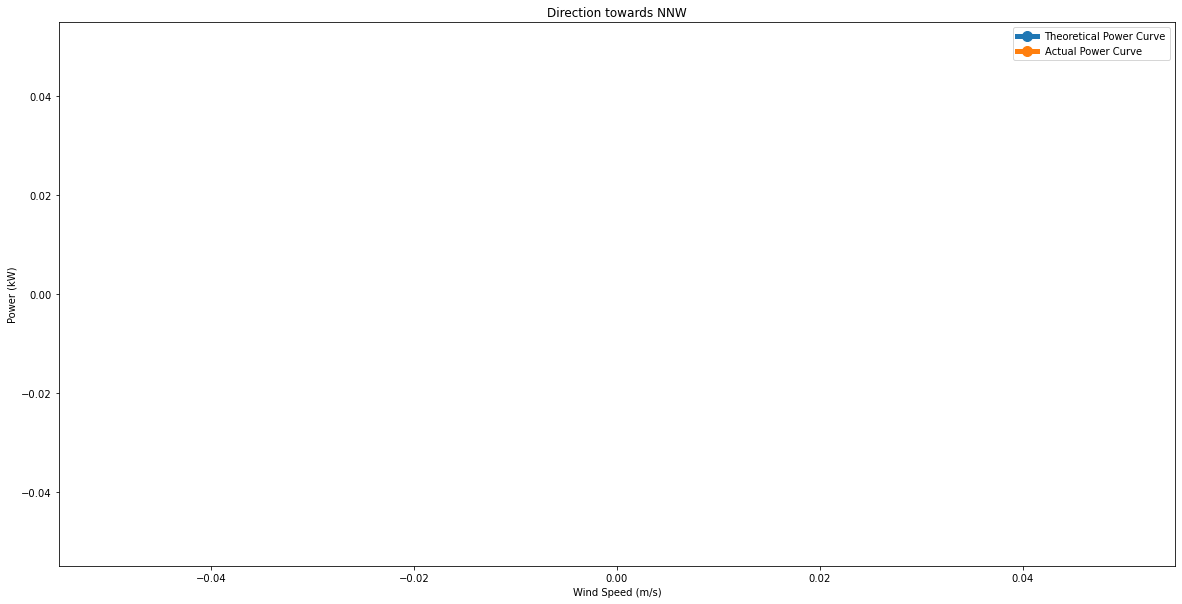

In [30]:
for i in range(0,12):
    graph_T(i)

In [31]:
X = data[[ 'WindDirection', 'month', 'day', 'Hour', 'meanSpeed']]

In [32]:
X

,WindDirection,month,day,Hour,meanSpeed
0,259.994904,1,1,0,5.5
1,268.641113,1,1,0,5.5
2,272.564789,1,1,0,5.0
3,271.258087,1,1,0,5.5
4,265.674286,1,1,0,5.5
...,...,...,...,...,...
50525,80.502724,12,31,23,11.5
50526,84.062599,12,31,23,7.5
50527,84.742500,12,31,23,8.5
50528,84.297913,12,31,23,9.5


In [33]:
y = data['ActivePower(kW)']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
import joblib

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [36]:
lasso = Lasso(alpha = 0.01)
model = lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)

print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(X_test)
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

Training RMSE and R2 score:
533.8827541152459
0.834908161147255
Testing RMSE and R2 score:
539.8257889435564
0.8292153379352329


In [38]:
print("Training MSE and MAE score:")
print(mean_squared_error(y_train,pred_train_lasso))
print(mean_absolute_error(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(X_test)
print("Testing MSE and MAE score:")
print(mean_squared_error(y_test,pred_test_lasso))
print(mean_absolute_error(y_test, pred_test_lasso))

Training MSE and MAE score:
285030.7951416801
390.1986862434888
Testing MSE and MAE score:
291411.88240853307
392.2440666053982


In [39]:
print(*model.predict([[270,1,1,23,5.5]]))


745.2822237012499


In [40]:
!pip install -U ibm-watson-machine-learning

In [41]:
from ibm_watson_machine_learning import APIClient
import json

In [42]:
wml_credentials = {
    "apikey":"05v3AdW4glComLU-hp_MrtEo9fn3RLu27kzVIttUAQ6l",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [43]:
wml_client = APIClient(wml_credentials)

In [44]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------  ------------------------
ID                                    NAME           CREATED
39f5e3f7-78bf-441e-af6a-040607518328  Wind-Power-B7  2022-11-14T09:34:34.326Z
------------------------------------  -------------  ------------------------


In [45]:
SPACE_ID= "39f5e3f7-78bf-441e-af6a-040607518328"

In [46]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [47]:
wml_client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [48]:
import sklearn
sklearn.__version__

'1.0.2'

In [49]:
MODEL_NAME = 'B7-Wind-Power'
DEPLOYMENT_NAME = 'Wind-Power-B7'
DEMO_MODEL = model

In [50]:

software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [51]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [52]:
#Save model

model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [53]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'ActivePower(kW)',
  'schemas': {'input': [{'fields': [{'name': 'WindDirection',
       'type': 'float64'},
      {'name': 'month', 'type': 'int64'},
      {'name': 'day', 'type': 'int64'},
      {'name': 'Hour', 'type': 'int64'},
      {'name': 'meanSpeed', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-18T03:14:11.115Z',
  'id': '77f9c8ed-2a3e-40ef-a3ef-af0b04301423',
  'modified_at': '2022-11-18T03:14:14.254Z',
  'name': 'B7-Wind-Power',
  'owner': 'IBMid-6640040VGB',
  'resource_key': '5e34b0c8-31c2-4854-b1d5-58318218c0a0',
  'space_id': '39f5e3f7-78bf-441e-af6a-040607518328'},
 'system': {'warnings': []}}

In [54]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'77f9c8ed-2a3e-40ef-a3ef-af0b04301423'

In [55]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [56]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '77f9c8ed-2a3e-40ef-a3ef-af0b04301423' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4e141cac-848d-44c4-a8a0-b9bd034cbf7d'
------------------------------------------------------------------------------------------------


